<a href="https://colab.research.google.com/github/zahidedusgun/Thyroid-cancer-reccurence-prediction/blob/main/PredictionofThyroidCancerReccurence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Thyroid_Diff.csv")
print("Data Size: ",data.shape)
data.head()

Data Size:  (383, 17)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("Thyroid_Diff.csv")

categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
                       'Thyroid Function', 'Physical Examination', 'Adenopathy',
                       'Pathology', 'Focality', 'Risk', 'Response', 'T', 'N', 'M', 'Stage', 'Recurred']

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

for col, le in label_encoders.items():
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


print(data.head())

Gender: {'F': 0, 'M': 1}
Smoking: {'No': 0, 'Yes': 1}
Hx Smoking: {'No': 0, 'Yes': 1}
Hx Radiothreapy: {'No': 0, 'Yes': 1}
Thyroid Function: {'Clinical Hyperthyroidism': 0, 'Clinical Hypothyroidism': 1, 'Euthyroid': 2, 'Subclinical Hyperthyroidism': 3, 'Subclinical Hypothyroidism': 4}
Physical Examination: {'Diffuse goiter': 0, 'Multinodular goiter': 1, 'Normal': 2, 'Single nodular goiter-left': 3, 'Single nodular goiter-right': 4}
Adenopathy: {'Bilateral': 0, 'Extensive': 1, 'Left': 2, 'No': 3, 'Posterior': 4, 'Right': 5}
Pathology: {'Follicular': 0, 'Hurthel cell': 1, 'Micropapillary': 2, 'Papillary': 3}
Focality: {'Multi-Focal': 0, 'Uni-Focal': 1}
Risk: {'High': 0, 'Intermediate': 1, 'Low': 2}
Response: {'Biochemical Incomplete': 0, 'Excellent': 1, 'Indeterminate': 2, 'Structural Incomplete': 3}
T: {'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6}
N: {'N0': 0, 'N1a': 1, 'N1b': 2}
M: {'M0': 0, 'M1': 1}
Stage: {'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4}
Recurre

In [5]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [6]:
X = data.drop(columns=['Recurred'])  # Özellikler
y = data['Recurred']  # Hedef değişken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print("Random Forest")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Train the Random Forest model without SMOTE
print("Without SMOTE:")
rf_model_no_smote = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_no_smote.fit(X_train, y_train)
y_pred_no_smote = rf_model_no_smote.predict(X_test)
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
classification_rep_no_smote = classification_report(y_test, y_pred_no_smote)
print("Model Accuracy (No SMOTE):", accuracy_no_smote)
print("\nClassification Report (No SMOTE):\n")
print(classification_rep_no_smote)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Random Forest model with SMOTE
print("\nWith SMOTE:")
rf_model_smote = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)
print("Model Accuracy (With SMOTE):", accuracy_smote)
print("\nClassification Report (With SMOTE):\n")
print(classification_rep_smote)



Random Forest
Without SMOTE:
Model Accuracy (No SMOTE): 0.987012987012987

Classification Report (No SMOTE):

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77


With SMOTE:
Model Accuracy (With SMOTE): 0.987012987012987

Classification Report (With SMOTE):

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [8]:
print("SVM")

from sklearn.svm import SVC

print("Without SMOTE:")
svm_model_no_smote = SVC(kernel='linear', random_state=42)
svm_model_no_smote.fit(X_train, y_train)
y_pred_no_smote = svm_model_no_smote.predict(X_test)
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
classification_rep_no_smote = classification_report(y_test, y_pred_no_smote)
print("Model Accuracy (No SMOTE):", accuracy_no_smote)
print("\nClassification Report (No SMOTE):\n")
print(classification_rep_no_smote)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nWith SMOTE:")
svm_model_smote = SVC(kernel='linear', random_state=42)
svm_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = svm_model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)
print("Model Accuracy (With SMOTE):", accuracy_smote)
print("\nClassification Report (With SMOTE):\n")
print(classification_rep_smote)


SVM
Without SMOTE:
Model Accuracy (No SMOTE): 0.961038961038961

Classification Report (No SMOTE):

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.84      0.91        19

    accuracy                           0.96        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.96      0.96      0.96        77


With SMOTE:
Model Accuracy (With SMOTE): 0.922077922077922

Classification Report (With SMOTE):

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.88      0.79      0.83        19

    accuracy                           0.92        77
   macro avg       0.91      0.88      0.89        77
weighted avg       0.92      0.92      0.92        77



In [9]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [10]:
print("Cat Boots")

from catboost import CatBoostClassifier

print("Without SMOTE:")
catboost_model_no_smote = CatBoostClassifier(random_state=42, verbose=0)
catboost_model_no_smote.fit(X_train, y_train)
y_pred_no_smote = catboost_model_no_smote.predict(X_test)
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
classification_rep_no_smote = classification_report(y_test, y_pred_no_smote)
print("Model Accuracy (No SMOTE):", accuracy_no_smote)
print("\nClassification Report (No SMOTE):\n")
print(classification_rep_no_smote)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nWith SMOTE:")
catboost_model_smote = CatBoostClassifier(random_state=42, verbose=0)
catboost_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = catboost_model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)
print("Model Accuracy (With SMOTE):", accuracy_smote)
print("\nClassification Report (With SMOTE):\n")
print(classification_rep_smote)


Cat Boots
Without SMOTE:
Model Accuracy (No SMOTE): 0.987012987012987

Classification Report (No SMOTE):

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77


With SMOTE:
Model Accuracy (With SMOTE): 1.0

Classification Report (With SMOTE):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        19

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [11]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


KNN
Without SMOTE:
Model Accuracy (No SMOTE): 0.8961038961038961

Classification Report (No SMOTE):

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.92      0.63      0.75        19

    accuracy                           0.90        77
   macro avg       0.91      0.81      0.84        77
weighted avg       0.90      0.90      0.89        77


With SMOTE:
Model Accuracy (With SMOTE): 0.9090909090909091

Classification Report (With SMOTE):

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.88      0.74      0.80        19

    accuracy                           0.91        77
   macro avg       0.90      0.85      0.87        77
weighted avg       0.91      0.91      0.91        77



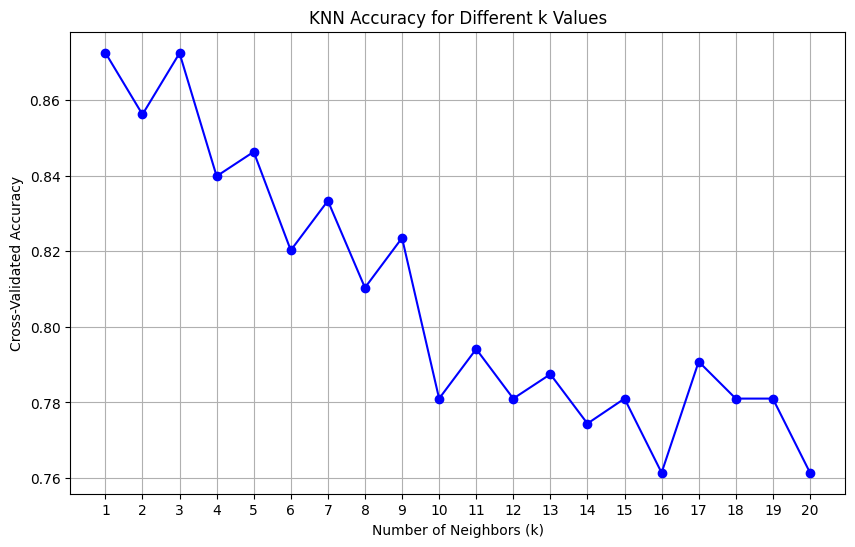

In [12]:
print("KNN")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

print("Without SMOTE:")
knn_model_no_smote = KNeighborsClassifier(n_neighbors=3)
knn_model_no_smote.fit(X_train, y_train)
y_pred_no_smote = knn_model_no_smote.predict(X_test)
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
classification_rep_no_smote = classification_report(y_test, y_pred_no_smote)
print("Model Accuracy (No SMOTE):", accuracy_no_smote)
print("\nClassification Report (No SMOTE):\n")
print(classification_rep_no_smote)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nWith SMOTE:")
knn_model_smote = KNeighborsClassifier(n_neighbors=3)
knn_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = knn_model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)
print("Model Accuracy (With SMOTE):", accuracy_smote)
print("\nClassification Report (With SMOTE):\n")
print(classification_rep_smote)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.xticks(k_values)
plt.grid()
plt.show()

Decision Tree
Decision Tree

Without SMOTE:
Model Accuracy (No SMOTE): 0.922077922077922

Classification Report (No SMOTE):

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.81      0.89      0.85        19

    accuracy                           0.92        77
   macro avg       0.89      0.91      0.90        77
weighted avg       0.93      0.92      0.92        77



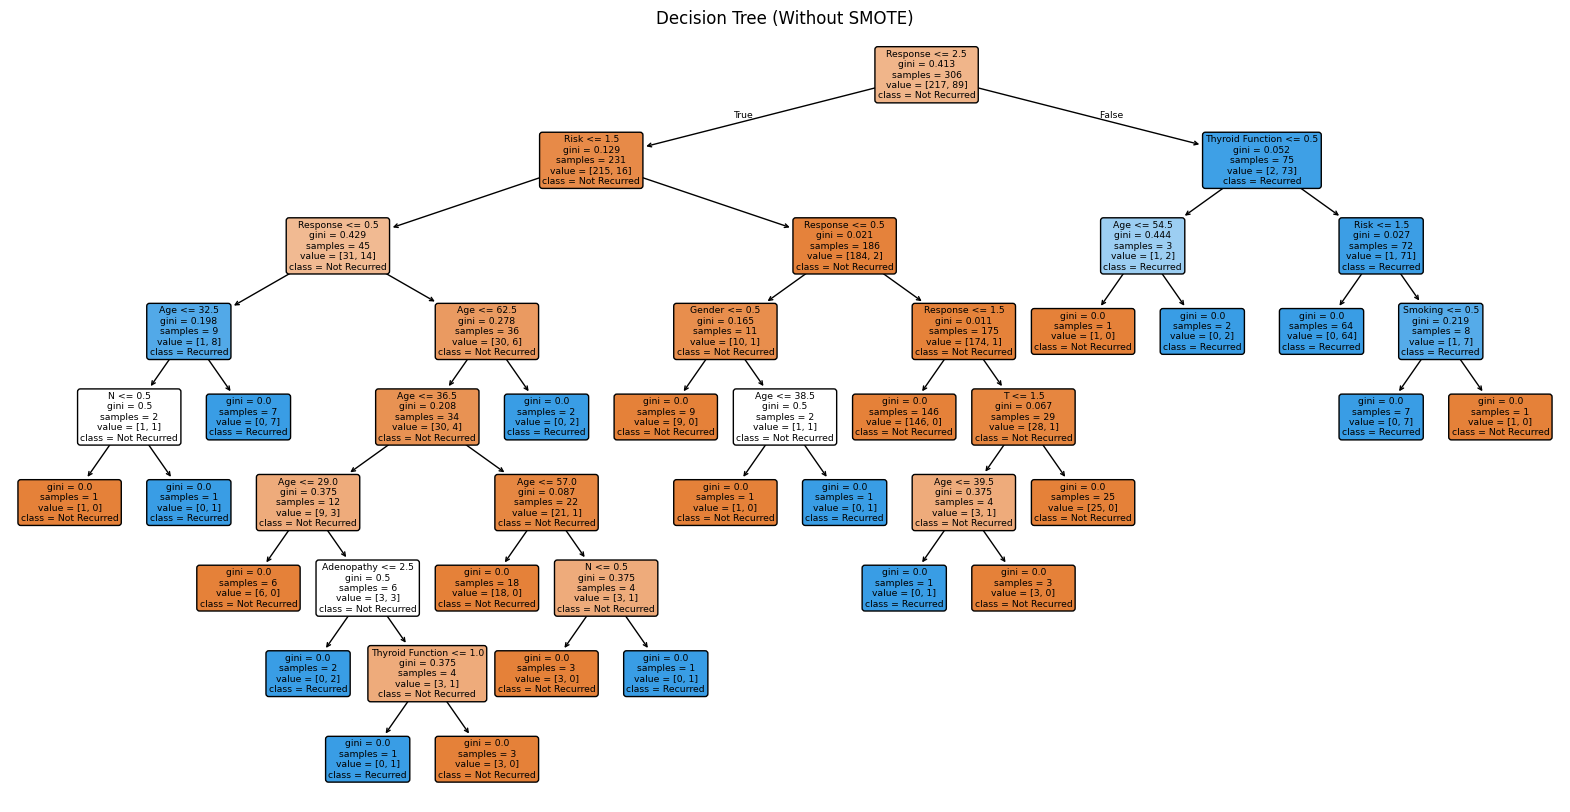


With SMOTE:
Model Accuracy (With SMOTE): 0.935064935064935

Classification Report (With SMOTE):

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.82      0.95      0.88        19

    accuracy                           0.94        77
   macro avg       0.90      0.94      0.92        77
weighted avg       0.94      0.94      0.94        77

Decision trees have been saved as PDF files.


In [13]:
print("Decision Tree")

from sklearn.tree import DecisionTreeClassifier, plot_tree

print("Decision Tree\n")
print("Without SMOTE:")
dt_model_no_smote = DecisionTreeClassifier(random_state=42)
dt_model_no_smote.fit(X_train, y_train)
y_pred_no_smote = dt_model_no_smote.predict(X_test)
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
classification_rep_no_smote = classification_report(y_test, y_pred_no_smote)
print("Model Accuracy (No SMOTE):", accuracy_no_smote)
print("\nClassification Report (No SMOTE):\n")
print(classification_rep_no_smote)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_no_smote, feature_names=X.columns, class_names=["Not Recurred", "Recurred"], filled=True, rounded=True)
plt.title("Decision Tree (Without SMOTE)")
plt.show()

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nWith SMOTE:")
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dt_model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)
print("Model Accuracy (With SMOTE):", accuracy_smote)
print("\nClassification Report (With SMOTE):\n")
print(classification_rep_smote)


plt.figure(figsize=(20, 10))
plot_tree(dt_model_no_smote, feature_names=X.columns, class_names=["Not Recurred", "Recurred"], filled=True, rounded=True)
plt.title("Decision Tree (Without SMOTE)")
plt.savefig("decision_tree_without_smote.pdf")
plt.close()


plt.figure(figsize=(20, 10))
plot_tree(dt_model_smote, feature_names=X.columns, class_names=["Not Recurred", "Recurred"], filled=True, rounded=True)
plt.title("Decision Tree (With SMOTE)")
plt.savefig("decision_tree_with_smote.pdf")
plt.close()


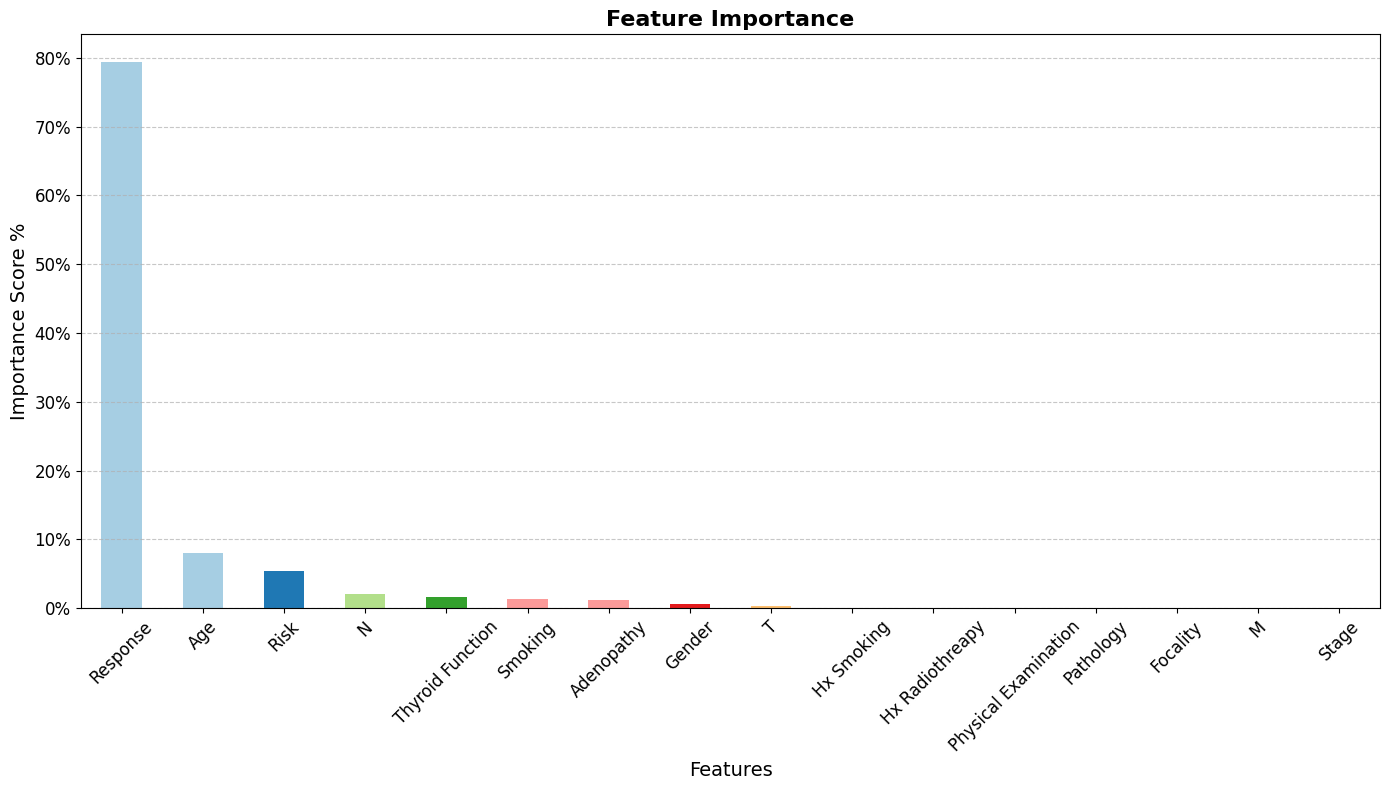

Top Risk Factors Without SMOTE:
Response            0.794357
Age                 0.080101
Risk                0.053553
N                   0.019805
Thyroid Function    0.016540
dtype: float64


In [14]:
importance_no_smote = pd.Series(dt_model_no_smote.feature_importances_, index=X.columns)
importance_no_smote = importance_no_smote.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
colors = plt.cm.Paired(np.linspace(0, 1, len(importance_no_smote)))
importance_no_smote.plot(kind='bar', color=colors)
plt.title("Feature Importance", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance Score %", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify the most important factors
print("Top Risk Factors Without SMOTE:")
print(importance_no_smote.head())


In [15]:
from sklearn.feature_selection import SelectKBest, chi2

print("Chi-Square")
# Chi-Square testi ile en iyi 5 özelliği seç
X = data.drop(columns=['Recurred'])  # Hedef değişkeni çıkar
y = data['Recurred']  # Hedef değişken
chi_selector = SelectKBest(chi2, k=16)
X_selected = chi_selector.fit_transform(X, y)

selected_features = chi_selector.get_support(indices=True)
print("Seçilen Özellikler:", X.columns[selected_features])

Chi-Square
Seçilen Özellikler: Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'],
      dtype='object')


Decision Tree

Without SMOTE:
Model Accuracy (No SMOTE): 0.8961038961038961

Classification Report (No SMOTE):

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        55
           1       0.79      0.86      0.83        22

    accuracy                           0.90        77
   macro avg       0.87      0.89      0.88        77
weighted avg       0.90      0.90      0.90        77



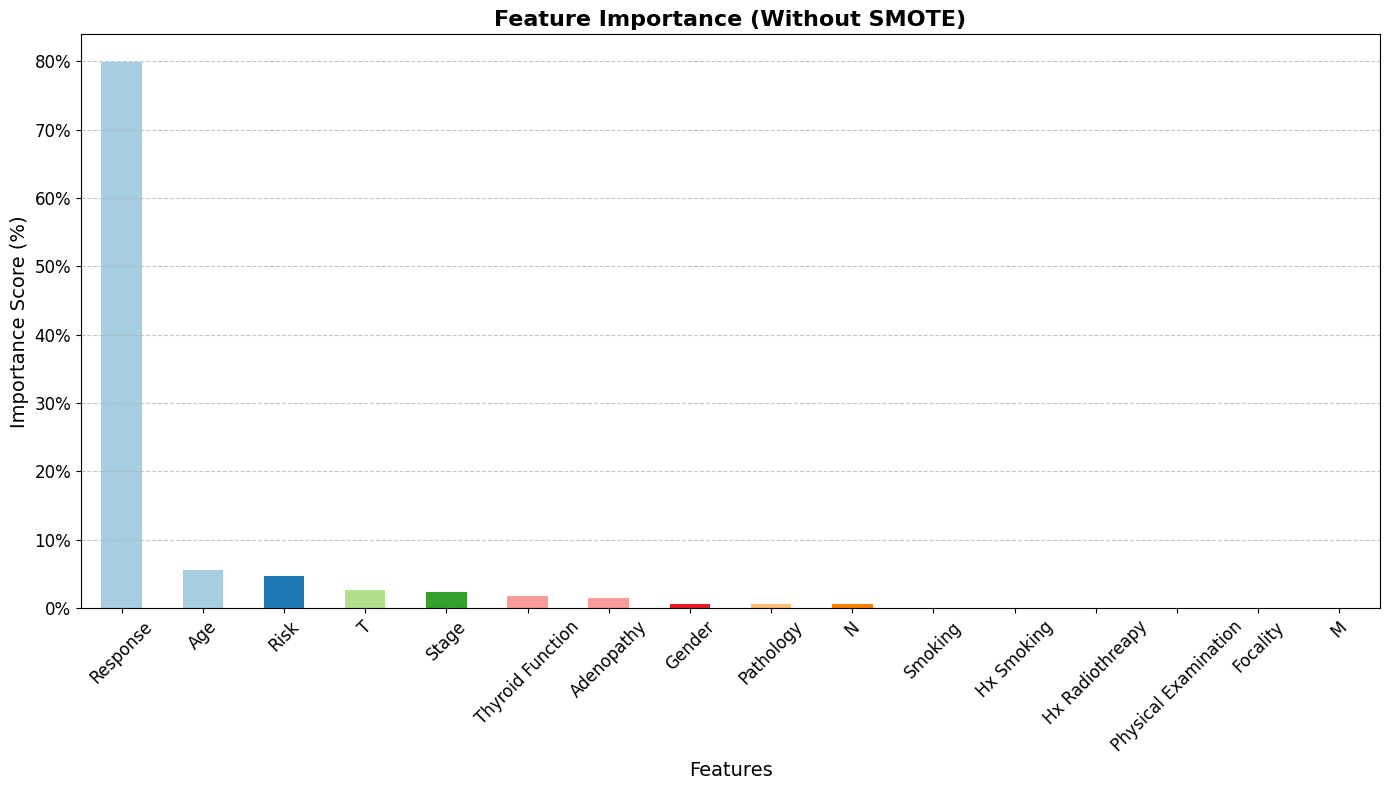

Top Risk Factors Without SMOTE:
Response    0.799681
Age         0.055375
Risk        0.046441
T           0.026268
Stage       0.023463
dtype: float64


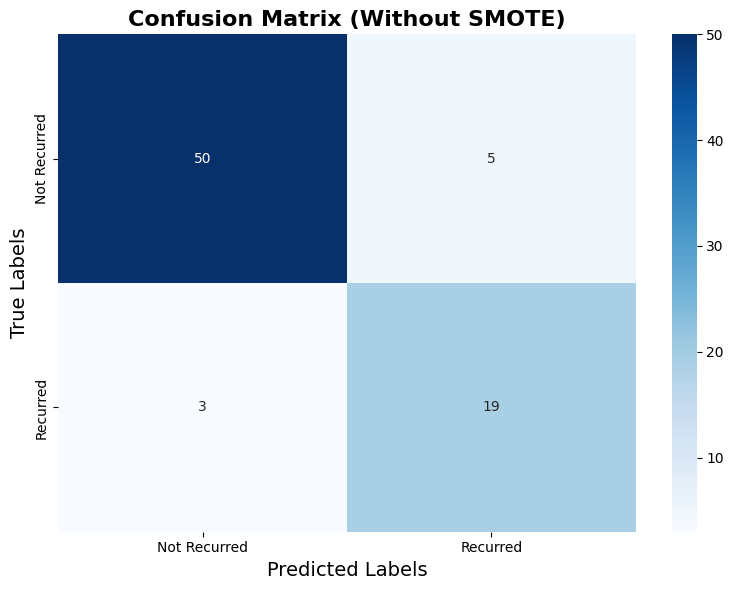

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Decision Tree Without SMOTE
print("Decision Tree\n")
print("Without SMOTE:")
dt_model_no_smote = DecisionTreeClassifier(random_state=42)
dt_model_no_smote.fit(X_train, y_train)
y_pred_no_smote = dt_model_no_smote.predict(X_test)
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
classification_rep_no_smote = classification_report(y_test, y_pred_no_smote)
print("Model Accuracy (No SMOTE):", accuracy_no_smote)
print("\nClassification Report (No SMOTE):\n")
print(classification_rep_no_smote)

# Feature importance for Decision Tree without SMOTE
importance_no_smote = pd.Series(dt_model_no_smote.feature_importances_, index=X.columns)
importance_no_smote = importance_no_smote.sort_values(ascending=False)

# Plot feature importances (Without SMOTE)
plt.figure(figsize=(14, 8))
colors = plt.cm.Paired(np.linspace(0, 1, len(importance_no_smote)))
importance_no_smote.plot(kind='bar', color=colors)
plt.title("Feature Importance (Without SMOTE)", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance Score (%)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify the most important factors
print("Top Risk Factors Without SMOTE:")
print(importance_no_smote.head())

# Confusion Matrix for Decision Tree Without SMOTE
conf_matrix = confusion_matrix(y_test, y_pred_no_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recurred', 'Recurred'], yticklabels=['Not Recurred', 'Recurred'])
plt.title("Confusion Matrix (Without SMOTE)", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.tight_layout()
plt.show()


Decision Tree

With SMOTE:
Model Accuracy (With SMOTE): 0.8831168831168831

Classification Report (With SMOTE):

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.74      0.91      0.82        22

    accuracy                           0.88        77
   macro avg       0.85      0.89      0.87        77
weighted avg       0.90      0.88      0.89        77



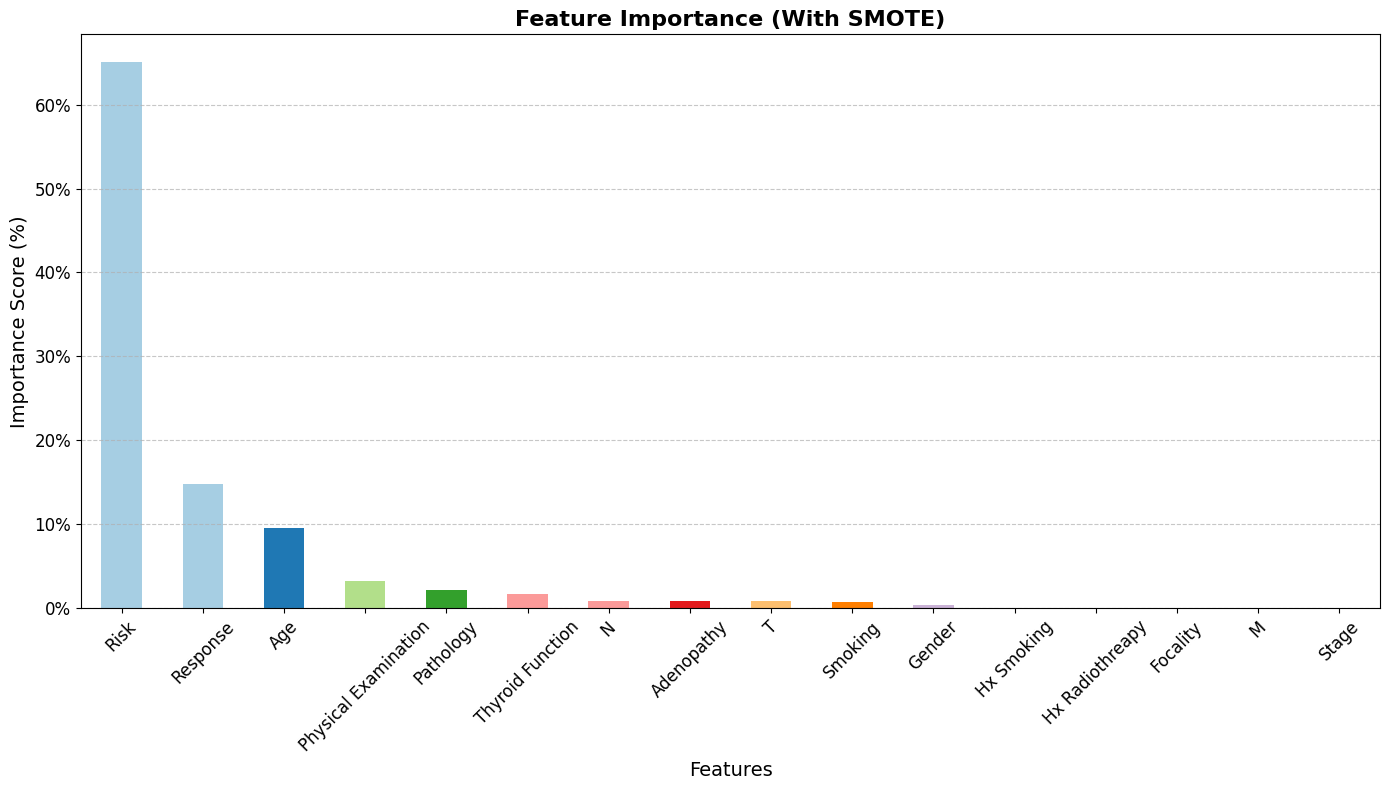

Top Risk Factors With SMOTE:
Risk                    0.651182
Response                0.147587
Age                     0.094969
Physical Examination    0.032090
Pathology               0.022020
dtype: float64


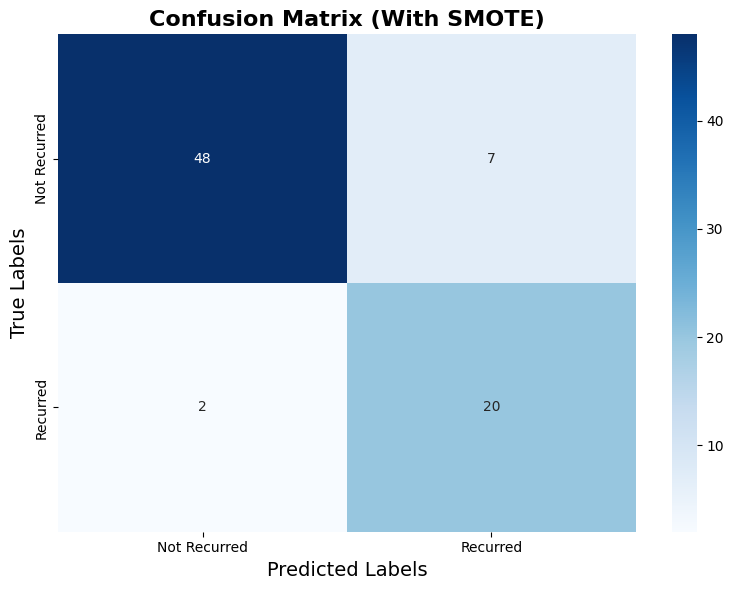

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Veri setini yükleme ve ön işleme
# X: Bağımsız değişkenler, y: Hedef değişken
# Örneğin:
# X = df.drop('Target', axis=1)
# y = df['Target']

# Eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Decision Tree with SMOTE
print("Decision Tree\n")
print("With SMOTE:")
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dt_model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)
print("Model Accuracy (With SMOTE):", accuracy_smote)
print("\nClassification Report (With SMOTE):\n")
print(classification_rep_smote)

# Feature importance for Decision Tree with SMOTE
importance_smote = pd.Series(dt_model_smote.feature_importances_, index=X.columns)
importance_smote = importance_smote.sort_values(ascending=False)

# Plot feature importances (With SMOTE)
plt.figure(figsize=(14, 8))
colors = plt.cm.Paired(np.linspace(0, 1, len(importance_smote)))
importance_smote.plot(kind='bar', color=colors)
plt.title("Feature Importance (With SMOTE)", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance Score (%)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify the most important factors
print("Top Risk Factors With SMOTE:")
print(importance_smote.head())

# Confusion Matrix for Decision Tree With SMOTE
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recurred', 'Recurred'], yticklabels=['Not Recurred', 'Recurred'])
plt.title("Confusion Matrix (With SMOTE)", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.tight_layout()
plt.show()
